In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk8 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, ratios, monitor) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, error_samplings) = rk_error_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    
    plt.figure()
    end_of_steps = [r[0] for r in ratios]
    ratios_at_end_of_steps = [r[1] for r in ratios]
    plt.plot(end_of_steps, ratios_at_end_of_steps)
    plt.axhline(y=1, color="red")
    plt.xlabel("t")
    plt.ylabel("ratio")
    # plt.title(f"error_estimate/exact_error at end of steps for tol={tol}")
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

    # # shape of errors - graphs
    # plt.figure()
    # for (x_i, x_i_plus_1, hb) in error_samplings:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     errors = []
    #     for i, pt in enumerate(pts_to_sample):
    #         y = solution([pt])[0]
    #         hb_eval = hb.eval(pt)
    #         error = abs(hb_eval - y)
    #         errors.append( error )

    #         # # print the error at the extremities
    #         # if i == 0:
    #         #     interpolation_error = hb_eval - hb.y_i
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #         # if i == len(pts_to_sample) - 1:
    #         #     interpolation_error = hb_eval - hb.y_i_plus_1
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #     maximum_error = max(errors)
    #     scaled_errors = [error / (maximum_error) for error in errors]

    #     # str_x_i = "{:.3f}".format(x_i)
    #     # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]
    #     plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    # plt.title("plot of shape of errors")
    # plt.xlabel("step scaled between 0 and 1")
    # plt.ylabel('scaled error')
    # # plt.legend()
    # plt.show()

    # # ====================================== figure of satisfying global defect
    # actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    # hb_prime_evals = [first_deriv(x) for x in t_eval]
    # plt.figure()
    # plt.plot(t_eval, actual_f_evals)
    # plt.plot(t_eval, hb_prime_evals)
    # plt.title(f"first derivative for tol={tol}")
    # plt.show()

    # defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    # plt.figure()
    # plt.plot(t_eval, defects)
    # plt.title(f"global defect for tol={tol}")
    # plt.show()
    
    # # ====================================== end figure of satisfying global defect

    # # ====================================== figure of defect shape

    # minimum_step_size = 0.01
    # defects_small_steps = []
    # plt.figure()
    # for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     defects = []
    #     for pt in pts_to_sample:
    #         y = solution([pt])[0]
    #         f_eval  = model(pt, y)[0]
    #         hb_prime_eval = hb.prime(pt)
    #         defects.append( abs(hb_prime_eval - f_eval) )
    #     maximum_defect = max(defects)
    #     # minimum_defect = min(defects)
    #     # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
    #     plot_vals = [ defect/ maximum_defect for defect in defects]
    #     #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]

    #     if (x_i_plus_1 - x_i < minimum_step_size):
    #         defects_small_steps.append([x_axis, plot_vals])
    #         continue
    #     plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    # plt.title("plot of defects")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # # plt.legend()
    # plt.show()
    # # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in defects_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of defects on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.show()

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999999, 0.5000000000000003, 0.5]
beta values [1.0000000000000002, 2.0000000000000004, 2.0, 1.999999999999999, 1.0]
n_steps 14
n_successful_steps 12


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 1.0, 1.9999999999999978]
beta values [1.9999999999999996, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.0, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


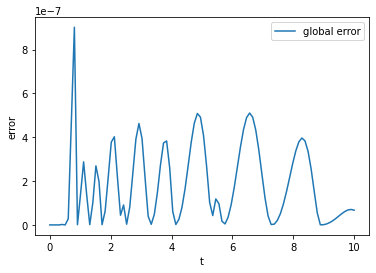

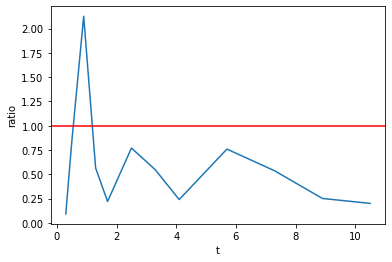

0.0
0.0
0.0
2.220446049250313e-16
4.207745263329343e-14
9.843459380931563e-12
8.233413950620161e-12
6.5851768482616535e-12
2.5037194539834218e-11
1.9792001371143897e-11
1.5490664306838653e-11
3.644190504914491e-11
2.7995661344704104e-11
2.165678747445554e-11
1.7326584611510043e-11


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 21
n_successful_steps 16


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 1.9999999999999978, 2.000000000000002, 2.0000000000000036]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 4.0, 4.000000000000007, 2.000000000000002]
n_steps 0
n_successful_steps 0

integration complete


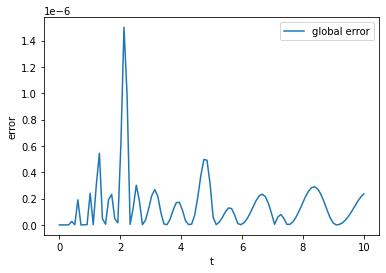

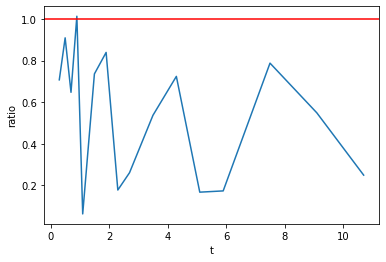

0.0
0.0
0.0
1.9317880628477724e-14
3.516087421218117e-11
3.743239052056424e-11
2.8444024913198973e-11
2.0101309505804466e-11
1.004493155321029e-09
6.121342877030145e-10
3.3837879720444164e-10
1.954398309855776e-10
7.51016082656264e-10
3.66830593678813e-10
1.917619049662811e-10
1.0908732250847208e-10
1.2291365841798907e-10
5.944439211702512e-11
3.136872185616202e-11


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 1.0000000000000002, 0.5]
beta values [0.9999999999999998, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0, 0.5]
n_steps 12
n_successful_steps 9


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 0.9999999999999999, 1.0]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 3.9999999999999982, 4.000000000000003, 2.0, 4.0, 1.0]
n_steps 0
n_successful_steps 0

integration complete


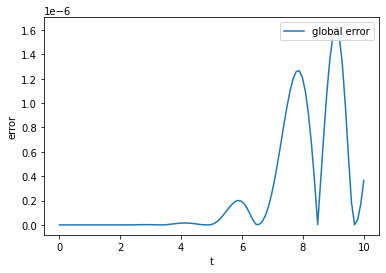

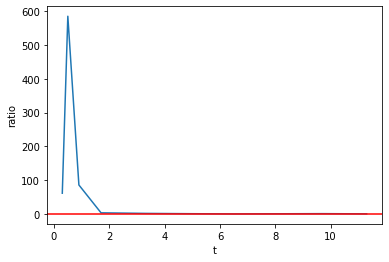

0.0
0.0
0.0
2.220446049250313e-16
4.440892098500626e-16
3.1086244689504383e-15
7.327471962526033e-15
9.561240688071848e-13
1.3216094885137863e-12
7.549516567451064e-14
1.3509602325711967e-09
1.4323955355166618e-09


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 1.9999999999999978, 0.5000000000000006, 4.000000000000001, 2.0, 2.000000000000009, 0.4999999999999978, 0.5000000000000011, 2.0000000000000044, 0.9999999999999822, 1.9999999999999645, 2.000000000000142, 0.4999999999999645, 0.5000000000000089]
beta values [0.4999999999999999, 1.0000000000000002, 2.0, 0.24999999999999994, 1.0, 0.5000000000000006, 1.9999999999999978, 0.5, 0.4999999999999978, 2.000000000000009, 1.9999999999999956, 1.0000000000000089, 1.0000000000000178, 1.9999999999999645, 2.000000000000142, 0.5000000000000089, 1.0000000000000022, 0.4999999999999989, 0.4999999999999645]
n_steps 575
n_successful_steps 382


Monitor10
alpha values [0.9999999999999911, 1.9999999999999978, 2.0000000000000004, 3.9999999999999956, 1.000000000000001, 2.0, 1.0, 4.000000000000018, 8.00000000000001, 1.9999999999999911, 2.000000000000009, 3.9999999999999822, 4.000000000000009, 2.0000000000000355, 1.9999999999999645, 1.0000000000000355, 3.99999999999992

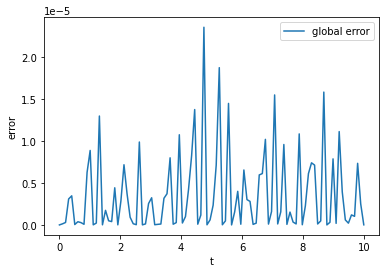

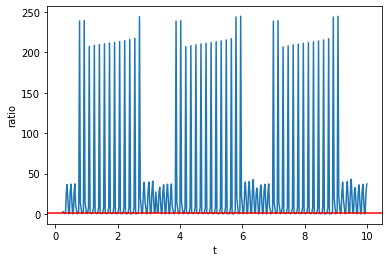

0.0
0.0
0.0
2.4371905604780864e-09
2.9596047002034e-09
4.891523676553433e-06
4.0465922918064834e-07
3.7199749947092187e-08
7.39226108104063e-09
7.381831792385718e-06
6.103273910151863e-07
5.558871413180455e-08
1.0415069917613096e-08
9.757179970759644e-06
8.064905543392342e-07
7.311179861524408e-08
1.3275469834539422e-08
8.642750404241895e-09
1.2404442340518962e-05
1.0250939284084382e-06
2.9369757048591794e-07
8.414913310605954e-08
1.5737213865385513e-08
1.0370824421457314e-08
1.47724679574468e-05
1.2206217905319505e-06
3.4971776574632685e-07
1.001997161909074e-07
1.8411389079986407e-08
1.1912357766874493e-08
1.6808727462458428e-05
1.3887364496145693e-06
3.978838609697277e-07
1.1399997412731011e-07
3.266593928685779e-08
1.4088328281758322e-08
1.2726120823813858e-08
1.8587556969817953e-05
1.5355721943999256e-06
4.399533753973728e-07
1.2605346744187784e-07
3.6119698898495756e-08
1.528322712829322e-08
1.3687290412178754e-08
1.987655175739178e-05
1.6419413276791417e-06
4.7042889006476685e-0

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 2.0, 1.9999999999999978, 1.0000000000000007, 1.0000000000000022, 0.9999999999999978, 0.5, 0.5000000000000006, 0.9999999999999989, 2.000000000000009, 0.4999999999999978, 1.0000000000000044, 1.9999999999999645, 0.5000000000000089]
beta values [0.9999999999999994, 1.0000000000000002, 0.5, 1.999999999999999, 1.0, 0.5000000000000006, 0.9999999999999978, 2.0000000000000044, 1.0000000000000022, 2.0, 1.9999999999999978, 0.4999999999999978, 2.000000000000009, 1.9999999999999956, 1.9999999999999645, 1.000000000000001, 0.5000000000000089, 0.9999999999999956]
n_steps 268
n_successful_steps 185


Monitor10
alpha values [0.9999999999999911, 1.9999999999999984, 2.0000000000000004, 3.9999999999999956, 2.0000000000000013, 4.000000000000004, 2.000000000000009, 1.9999999999999867, 1.0, 2.0, 1.0000000000000022, 4.000000000000018, 1.9999999999999911, 1.9999999999999645, 2.0000000000000355, 1.0000000000000355, 3.999999999999929, 2.000000000000

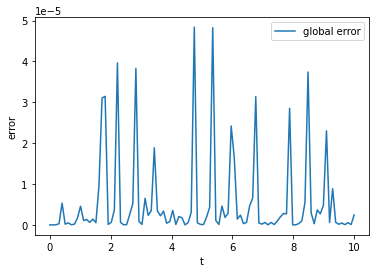

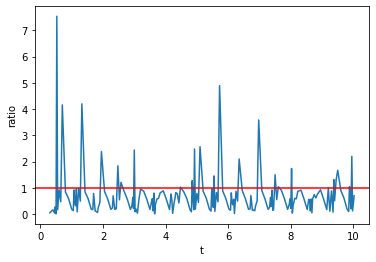

0.0
0.0
0.0
1.7463364088143862e-11
7.54159674709598e-08
9.710637116633336e-08
1.0022042018498212e-07
9.465206796122061e-08
8.407703377955045e-08
7.308669647265731e-08
5.633749955435974e-08
4.646713946954151e-08
4.098520500761538e-08
3.7963464372126055e-08
4.3810739480676375e-08
7.825481418421987e-08
1.0325506472064205e-07
1.1537793498384019e-07
1.204574087143584e-07
1.1502451169320693e-07
1.0275859296804413e-07
8.941945517371153e-08
6.870604707387429e-08
5.6405455417518624e-08
4.9542677960090487e-08
4.554861021688339e-08
5.2164910169238965e-08
8.729529588080709e-08
1.1518033971036346e-07
1.294658253936376e-07
1.2891116907276512e-07
1.1591124438048439e-07
8.734498746498787e-08
7.695069026425472e-08
6.287870624177572e-08
5.4995003218039074e-08
5.018683246760247e-08
5.7044108991988196e-08
9.155736568899897e-08
1.207251363322115e-07
1.3640101736989152e-07
1.3752062932859133e-07
1.2454964770647337e-07
1.0876959510852657e-07
8.3092052349798e-08
6.757849835281604e-08
5.885365705893264e-08
5.3

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 16
n_successful_steps 14


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 0.9999999999999989, 1.9999999999999978, 1.0]
beta values [1.999999999999999, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


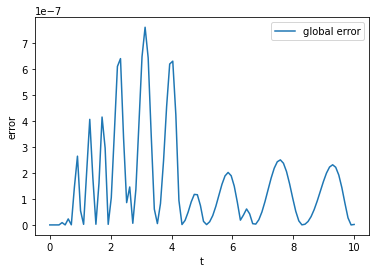

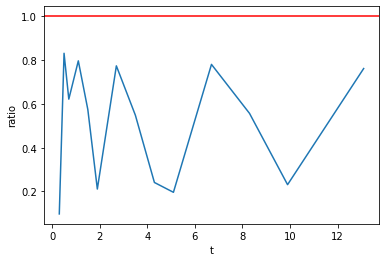

0.0
0.0
0.0
1.9984014443252818e-15
4.9960036108132044e-15
4.6629367034256575e-15
8.548717289613705e-15
1.0824674490095276e-14
1.2101430968414206e-14
1.5265566588595902e-14
1.4099832412739488e-14
1.251776460264864e-14
1.0325074129013956e-14
6.411537967210279e-15
5.467848396278896e-15
5.245803791353865e-15
5.4817261840867104e-15


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 1.0000000000000004, 0.9999999999999989]
beta values [0.9999999999999996, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0000000000000013, 2.0, 1.000000000000001, 1.9999999999999978]
n_steps 24
n_successful_steps 15


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 2.000000000000001, 2.0, 2.000000000000002, 1.9999999999999978]
beta values [1.999999999999999, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 2.0, 4.000000000000003, 4.0, 2.000000000000002, 1.9999999999999978, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


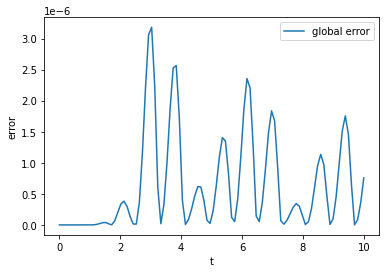

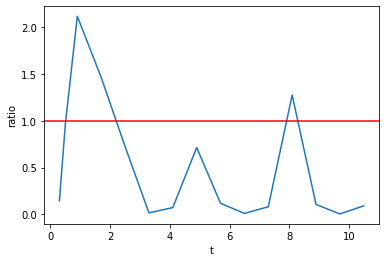

0.0
0.0
0.0
0.0
7.771561172376096e-16
4.9960036108132044e-15
2.0823481827747514e-12
9.494627306594339e-13
2.1699309016298685e-12
5.083045095943817e-12
6.0565996662376165e-12
4.727829239214998e-12
2.0803359035426183e-12
2.7461366514103247e-13
1.1377565556358604e-12
3.226308109560705e-13
1.3950507415927405e-12
2.8416713426793194e-12


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999999, 0.5000000000000003, 1.0000000000000007, 0.4999999999999997]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0000000000000013, 2.0]
n_steps 15
n_successful_steps 13


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0000000000000013, 1.0000000000000007, 0.9999999999999989, 1.9999999999999978, 2.000000000000002]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 1.9999999999999978, 4.000000000000003, 2.0, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


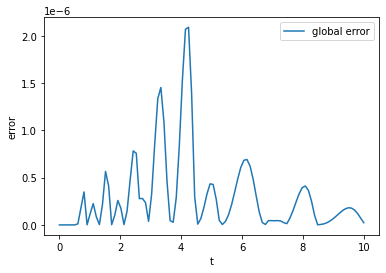

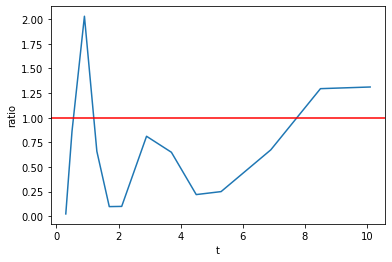

0.0
0.0
0.0
1.2323475573339238e-14
1.5941692410592623e-12
6.788296036397412e-10
6.097554128281502e-10
4.1087044877485823e-10
2.461841841494561e-10
2.314402824943329e-08
9.33527566360226e-09
2.826013201229216e-09
7.604876728350973e-10
4.954177557081607e-08
3.95896204707924e-09
2.376969732154066e-10


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)